# Stock price prediction using Regression

## Library 

In [98]:
import pandas as pd
import copy
import quandl, math, datetime
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#  scaling between -1 and +1 using preprocessing
#  create training and test - cross_validation (model_selection)

In [99]:
df = quandl.get('WIKI/GOOGL')
print(df.head())


              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

## Data Pre-Processing

In [100]:
# Save to csv
df.to_csv('Wiki_Googl.csv')

In [101]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [102]:
df.tail(5)

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0


In [103]:
df['HL_PCT'] =  (df['Adj. High'] - df ['Adj. Close']) / df['Adj. Close'] * 100.0

In [104]:
df['PCT_change'] =  (df['Adj. Close'] - df ['Adj. Open']) / df['Adj. Open'] * 100.0

In [105]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [106]:
# Save to csv
df.to_csv('WGoogle_Data.csv')
df.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0
2018-03-22,1053.15,2.921711,-2.487014,3418154.0
2018-03-23,1026.55,3.918952,-2.360729,2413517.0
2018-03-26,1054.09,0.491419,0.332191,3272409.0
2018-03-27,1006.94,5.720301,-5.353887,2940957.0


In [107]:
# Placeholder for forecast column
forecast_col = 'Adj. Close'

In [108]:
df.fillna(-9999,inplace=True)

In [109]:
forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

35


In [110]:
df.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0
2018-03-22,1053.15,2.921711,-2.487014,3418154.0
2018-03-23,1026.55,3.918952,-2.360729,2413517.0
2018-03-26,1054.09,0.491419,0.332191,3272409.0
2018-03-27,1006.94,5.720301,-5.353887,2940957.0


In [111]:
# Shift works like Lag() and Lead()function
df['label'] = df[forecast_col].shift(-forecast_out)
df.to_csv('WGoogle_Shift.csv')

In [112]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
# X with y value
X = X[:-forecast_out]
# X we don't have a y value 
X_lately = X[-forecast_out:]


df.dropna(inplace=True)
y = np.array(df['label'])

In [113]:
# Just to check the length of the array
print(len(X),len(y),len(df))

3389 3389 3389


In [114]:
#Split dataset to training and testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [115]:
df.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,0.896914,-0.029718,1792602.0,1094.00
2018-01-31,1182.22,0.346805,-0.134312,1643877.0,1053.15
2018-02-01,1181.59,0.495942,0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.081129,-0.729098,5798880.0,1054.09
2018-02-05,1068.76,4.325574,-2.893850,3742469.0,1006.94


In [116]:
# Prepare DF for each Alogrithms
# This does a shallow copy 
# df_lr,df_svr,df_dt,df_rf,df_gb,df_knn = df,df,df,df,df,df
df_lr = copy.deepcopy(df)
df_svr = copy.deepcopy(df)
df_dt = copy.deepcopy(df)
df_rf = copy.deepcopy(df)
df_gb = copy.deepcopy(df)
df_knn = copy.deepcopy(df)

In [117]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,0.896914,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,0.346805,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,0.495942,0.476195,2774967.0,1026.550000


## Algorithms Evaluate 

In [118]:
import seaborn as sns
%matplotlib inline
sns.set()
seed = 1234

models = []
models.append(('LR', linear_model.LinearRegression(fit_intercept=False)))
models.append(('SVR',svm.SVR(kernel='poly')))
models.append(('DT', tree.DecisionTreeRegressor(random_state=seed)))
models.append(('RF', RandomForestRegressor(random_state=seed)))
models.append(('GB', GradientBoostingRegressor(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))

results = []
names = []
for name, model in models:
    mdl = model.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    results.append(mape)
    names.append(name)
    msg = "%s: %f " % (name, mape)
    print(msg)

LR: 1.424223 
SVR: 0.319272 
DT: 0.098058 
RF: 0.074481 
GB: 0.077091 
KNN: 0.115510 


## Linear Regression 

In [119]:
clf_lr = LinearRegression()
# fit is synonyms with train 
clf_lr.fit(X_train,y_train)
# score is synonyms with test
accuracy = clf_lr.score(X_test,y_test)

print("ACCURACY:",accuracy)
print("-"*80)
forecast_set = clf_lr.predict(X_lately)
print("{0} rows forecast".format(forecast_out))
print(forecast_set)


ACCURACY: 0.9784278842530114
--------------------------------------------------------------------------------
35 rows forecast
[1077.49122052 1092.68820668 1106.76763379 1101.44918506 1094.86093812
 1092.20682791 1090.88029266 1087.89892267 1081.305122   1076.83194895
 1074.83130093 1093.63431985 1111.98240419 1116.84163792 1131.99448604
 1135.96034268 1134.89862895 1132.3557201  1134.25912805 1152.11269503
 1150.60903567 1162.07139638 1158.41664912 1166.31625148 1185.78496406
 1198.83424959 1192.46424064 1205.15437291 1211.10178884 1208.01894233
 1198.83000603 1205.1086691  1203.35876242 1138.92515166 1082.68596342]


### Forecasting

In [120]:
forecast_set = clf_lr.predict(X_lately)
#print(forecast_set,accuracy,forecast_out)

# Forecast column set to Nan 
df_lr['Forecast'] = np.nan

last_date = df_lr.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# Populate the df with new dates and forecast values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_lr.loc[next_date] = [ np.nan for _ in range(len(df_lr.columns)-1)] + [i]

In [121]:
# If the date exits return index or replace it with date
df_lr.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-07 17:00:00,NaN,NaN,NaN,NaN,NaN,1198.830006
2018-03-08 17:00:00,NaN,NaN,NaN,NaN,NaN,1205.108669
2018-03-09 17:00:00,NaN,NaN,NaN,NaN,NaN,1203.358762
2018-03-10 17:00:00,NaN,NaN,NaN,NaN,NaN,1138.925152
2018-03-11 18:00:00,NaN,NaN,NaN,NaN,NaN,1082.685963


### Plot Predictions

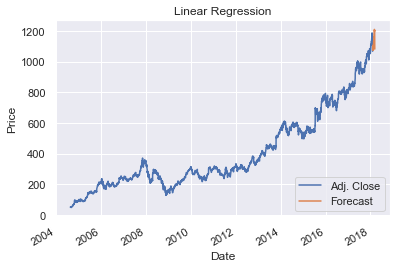

In [122]:
df_lr['Adj. Close'].plot()
df_lr['Forecast'].plot()
plt.legend(loc=4)
plt.title("Linear Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


## Support Vector Regression

In [123]:
clf_svr = svm.SVR(kernel='poly')
# fit is synonyms with train 
clf_svr.fit(X_train,y_train)
# score is synonyms with test
accuracy = clf_svr.score(X_test,y_test)

print("ACCURACY:",accuracy)
print("-"*80)
forecast_set = clf_svr.predict(X_lately)
print("{0} rows forecast".format(forecast_out))
print(forecast_set)

ACCURACY: 0.6472697771112879
--------------------------------------------------------------------------------
35 rows forecast
[1075.38254785 1124.58476094 1239.88733169 1197.22377305 1164.0158031
 1160.92328496 1188.62067517 1177.50005121 1127.08875305 1109.45513818
 1113.64981021 1219.69433809 1253.69256208 1227.72005561 1312.04451797
 1323.68497898 1318.81545771 1333.56377413 1336.84030427 1443.73303863
 1313.33993556 1461.52270955 1413.68371758 1477.27129487 1574.9353019
 1578.8854049  1503.80783731 1620.09492707 1650.68628394 1560.66441382
 1513.73251446 1600.64596109 1525.4593957  1137.19136519 1380.18592747]


### Forecasting

In [124]:
forecast_set = clf_svr.predict(X_lately)
#print(forecast_set,accuracy,forecast_out)

# Forecast column set to Nan 
df_svr['Forecast'] = np.nan

last_date = df_svr.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# Populate the df with new dates and forecast values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_svr.loc[next_date] = [ np.nan for _ in range(len(df_svr.columns)-1)] + [i]

In [125]:
# If the date exits return index or replace it with date
df_svr.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-07 17:00:00,NaN,NaN,NaN,NaN,NaN,1513.732514
2018-03-08 17:00:00,NaN,NaN,NaN,NaN,NaN,1600.645961
2018-03-09 17:00:00,NaN,NaN,NaN,NaN,NaN,1525.459396
2018-03-10 17:00:00,NaN,NaN,NaN,NaN,NaN,1137.191365
2018-03-11 18:00:00,NaN,NaN,NaN,NaN,NaN,1380.185927


### Plot Predictions

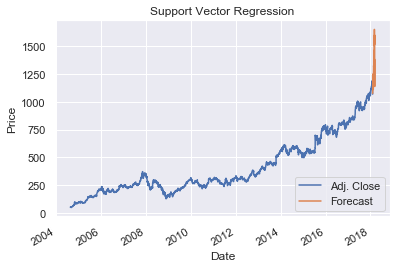

In [126]:
df_svr['Adj. Close'].plot()
df_svr['Forecast'].plot()
plt.legend(loc=4)
plt.title("Support Vector Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Decision Tree Regressor

In [127]:
clf_dt = tree.DecisionTreeRegressor(random_state=seed)
# fit is synonyms with train 
clf_dt.fit(X_train,y_train)
# score is synonyms with test
accuracy = clf_dt.score(X_test,y_test)

print("ACCURACY:",accuracy)
print("-"*80)
forecast_set = clf_dt.predict(X_lately)
print("{0} rows forecast".format(forecast_out))
print(forecast_set)

ACCURACY: 0.970558165741581
--------------------------------------------------------------------------------
35 rows forecast
[1084.43 1055.41 1130.65 1043.43 1070.85 1054.14 1091.36 1091.36 1095.5
 1103.59 1113.75 1109.9  1128.09 1143.7  1117.51 1094.76 1071.41 1117.51
 1094.76 1109.9  1115.04 1165.93 1160.84 1165.93 1139.91 1148.89 1143.5
 1100.07 1100.07 1095.8  1094.   1053.15 1176.17 1006.94 1006.94]


### Forecasting

In [128]:
forecast_set = clf_dt.predict(X_lately)
#print(forecast_set,accuracy,forecast_out)

# Forecast column set to Nan 
df_dt['Forecast'] = np.nan

last_date = df_dt.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# Populate the df with new dates and forecast values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_dt.loc[next_date] = [ np.nan for _ in range(len(df_dt.columns)-1)] + [i]

In [129]:
# If the date exits return index or replace it with date
df_dt.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-07 17:00:00,NaN,NaN,NaN,NaN,NaN,1094.00
2018-03-08 17:00:00,NaN,NaN,NaN,NaN,NaN,1053.15
2018-03-09 17:00:00,NaN,NaN,NaN,NaN,NaN,1176.17
2018-03-10 17:00:00,NaN,NaN,NaN,NaN,NaN,1006.94
2018-03-11 18:00:00,NaN,NaN,NaN,NaN,NaN,1006.94


### Plot Predictions

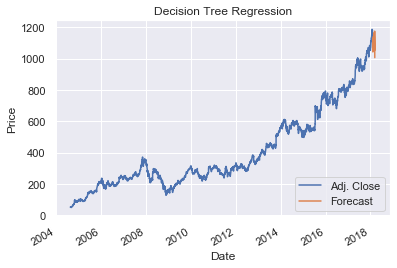

In [130]:
df_dt['Adj. Close'].plot()
df_dt['Forecast'].plot()
plt.legend(loc=4)
plt.title("Decision Tree Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Random Forest Regressor

In [131]:
clf_rf = RandomForestRegressor(random_state=seed)
# fit is synonyms with train 
clf_rf.fit(X_train,y_train)
# score is synonyms with test
accuracy = clf_rf.score(X_test,y_test)

print("ACCURACY:",accuracy)
print("-"*80)
forecast_set = clf_rf.predict(X_lately)
print("{0} rows forecast".format(forecast_out))
print(forecast_set)

ACCURACY: 0.9833232270173163
--------------------------------------------------------------------------------
35 rows forecast
[1092.8536 1078.4563 1121.1963 1060.3552 1089.626  1063.2083 1102.2251
 1095.2777 1099.7608 1102.5655 1104.8481 1115.595  1128.3053 1113.1139
 1112.7045 1111.3331 1076.5998 1111.2739 1097.2996 1129.7376 1120.2422
 1131.464  1123.6837 1150.7148 1138.6573 1138.3878 1124.1216 1100.6937
 1104.4411 1097.6451 1099.6114 1075.6029 1104.1866 1088.4975 1057.2326]


### Forecasting

In [132]:
forecast_set = clf_rf.predict(X_lately)
#print(forecast_set,accuracy,forecast_out)

# Forecast column set to Nan 
df_rf['Forecast'] = np.nan

last_date = df_rf.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# Populate the df with new dates and forecast values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_rf.loc[next_date] = [ np.nan for _ in range(len(df_rf.columns)-1)] + [i]

In [133]:
# If the date exits return index or replace it with date
df_rf.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-07 17:00:00,NaN,NaN,NaN,NaN,NaN,1099.6114
2018-03-08 17:00:00,NaN,NaN,NaN,NaN,NaN,1075.6029
2018-03-09 17:00:00,NaN,NaN,NaN,NaN,NaN,1104.1866
2018-03-10 17:00:00,NaN,NaN,NaN,NaN,NaN,1088.4975
2018-03-11 18:00:00,NaN,NaN,NaN,NaN,NaN,1057.2326


### Plot Predictions

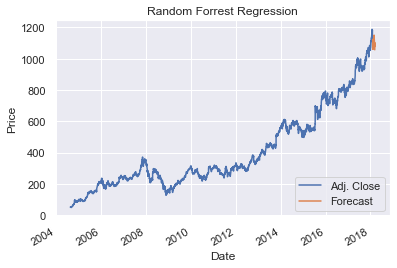

In [134]:
df_rf['Adj. Close'].plot()
df_rf['Forecast'].plot()
plt.legend(loc=4)
plt.title("Random Forrest Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Gradient Boosting Regressor

In [135]:
clf_gb = GradientBoostingRegressor()
# fit is synonyms with train 
clf_gb.fit(X_train,y_train)
# score is synonyms with test
accuracy = clf_gb.score(X_test,y_test)

print("ACCURACY:",accuracy)
print("-"*80)
forecast_set = clf_gb.predict(X_lately)
print("{0} rows forecast".format(forecast_out))
print(forecast_set)

ACCURACY: 0.9836800307495368
--------------------------------------------------------------------------------
35 rows forecast
[1105.32383656 1073.72838357 1087.09311624 1090.27373672 1106.60143932
 1092.49659518 1109.41021913 1101.41470075 1108.39767765 1108.39767765
 1107.40237107 1103.64334291 1111.31121698 1109.04397047 1103.58358305
 1113.05212965 1102.09089184 1107.06445934 1106.93121836 1112.19852586
 1116.17348374 1125.90622083 1129.04705078 1132.03995323 1126.06091581
 1124.00246203 1131.34347042 1098.51486195 1087.02152746 1103.5202741
 1100.21797557 1079.76711794 1077.21725024 1069.30013527 1047.57703744]


### Forecasting

In [136]:
forecast_set = clf_gb.predict(X_lately)
#print(forecast_set,accuracy,forecast_out)

# Forecast column set to Nan 
df_gb['Forecast'] = np.nan

last_date = df_gb.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# Populate the df with new dates and forecast values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_gb.loc[next_date] = [ np.nan for _ in range(len(df_gb.columns)-1)] + [i]

In [138]:
# If the date exits return index or replace it with date
df_gb.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-07 17:00:00,NaN,NaN,NaN,NaN,NaN,1100.217976
2018-03-08 17:00:00,NaN,NaN,NaN,NaN,NaN,1079.767118
2018-03-09 17:00:00,NaN,NaN,NaN,NaN,NaN,1077.217250
2018-03-10 17:00:00,NaN,NaN,NaN,NaN,NaN,1069.300135
2018-03-11 18:00:00,NaN,NaN,NaN,NaN,NaN,1047.577037


### Plot Predictions

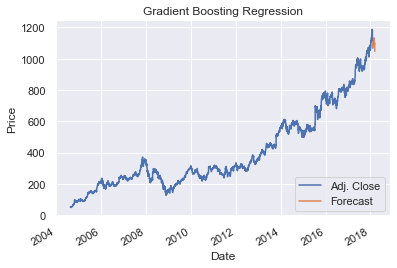

In [139]:
df_gb['Adj. Close'].plot()
df_gb['Forecast'].plot()
plt.legend(loc=4)
plt.title("Gradient Boosting Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## KNeighbors Regressor

In [140]:
clf_knn = KNeighborsRegressor()
# fit is synonyms with train 
clf_knn.fit(X_train,y_train)
# score is synonyms with test
accuracy = clf_knn.score(X_test,y_test)

print("ACCURACY:",accuracy)
print("-"*80)
forecast_set = clf_knn.predict(X_lately)
print("{0} rows forecast".format(forecast_out))
print(forecast_set)

ACCURACY: 0.972024991623426
--------------------------------------------------------------------------------
35 rows forecast
[1066.09  1095.87  1108.228 1074.818 1100.162 1088.13  1091.11  1085.836
 1100.162 1093.114 1085.836 1117.89  1140.07  1079.31  1133.022 1119.256
 1085.064 1114.14  1109.284 1107.788 1091.004 1112.61  1084.718 1117.16
 1107.788 1117.11  1090.024 1112.56  1112.56  1115.754 1094.216 1096.046
 1108.178 1117.22   850.642]


### Forecasting

In [141]:
forecast_set = clf_knn.predict(X_lately)
#print(forecast_set,accuracy,forecast_out)

# Forecast column set to Nan 
df_knn['Forecast'] = np.nan

last_date = df_knn.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# Populate the df with new dates and forecast values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_knn.loc[next_date] = [ np.nan for _ in range(len(df_knn.columns)-1)] + [i]

In [142]:
df_knn.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-07 17:00:00,NaN,NaN,NaN,NaN,NaN,1094.216
2018-03-08 17:00:00,NaN,NaN,NaN,NaN,NaN,1096.046
2018-03-09 17:00:00,NaN,NaN,NaN,NaN,NaN,1108.178
2018-03-10 17:00:00,NaN,NaN,NaN,NaN,NaN,1117.220
2018-03-11 18:00:00,NaN,NaN,NaN,NaN,NaN,850.642


### Plot Predictions

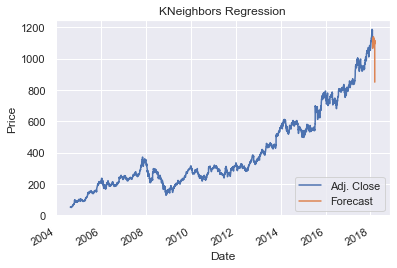

In [143]:
df_knn['Adj. Close'].plot()
df_knn['Forecast'].plot()
plt.legend(loc=4)
plt.title("KNeighbors Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()